#### Importing Libraries

In [125]:
import spotipy
import matplotlib.pyplot as plt
from spotipy.oauth2 import SpotifyClientCredentials
from matplotlib_venn import venn3

#### Spotify Credintials

In [126]:
# Replace with your Spotify API credentials
client_id = 'your own id after signing up to Spotify developrs'
client_secret = 'your own secret after signing up to Spotify developrs'

# Authenticate with Spotify API
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

#### Define the Playlists

In [127]:
playlists = {
    'Miche__': 'spotify:playlist:6Hhg0Tl7LxCrB6JcGYigbl',
    'Callie': 'spotify:playlist:25bHcwkTVbVOmN9V6me5Dy',
    'vEonz': 'spotify:playlist:7K4ES1NBkclzoxvJrCYm6V',
    'Chopper': 'spotify:playlist:2DMLucgIMno3vUKamJSzAo',
    'Iffat' : 'spotify:playlist:26sum34aP36xkvh6UDHwso'
}

#### Generate sets

In [128]:
genre_sets = {person: set() for person in playlists.keys()}

# Create a dictionary to store the genres for each artist
artist_genres = {}

# Retrieve the genres for each artist in each playlist
for person, playlist_uri in playlists.items():
    results = sp.playlist_items(playlist_uri, fields='items.track.artists.id')
    artist_ids = {result['track']['artists'][0]['id'] for result in results['items'] if result['track']}
    for artist_id in artist_ids:
        if artist_id not in artist_genres:
            artist = sp.artist(artist_id)
            artist_genres[artist_id] = artist['genres']
            
# Use the artist genres to update the genre sets for each person
for person, playlist_uri in playlists.items():
    results = sp.playlist_items(playlist_uri, fields='items.track.artists.id')
    artist_ids = {result['track']['artists'][0]['id'] for result in results['items'] if result['track']}
    for artist_id in artist_ids:
        if artist_id in artist_genres:
            genre_sets[person].update(artist_genres[artist_id])
            

# Print the unique genres for each person
for person, genres in genre_sets.items():
    print(f"{person}: {genres}")


Miche__: {'mellow gold', 'neo-psychedelic', 'baroque pop', 'indie r&b', 'album rock', 'lo-fi indie', 'dark trap', 'underground hip hop', 'indie rock', 'west coast rap', 'industrial hip hop', 'new french touch', 'progressive post-hardcore', 'bedroom pop', 'indietronica', 'dance rock', 'bass house', 'hip hop', 'dreamo', 'synthpop', 'chill r&b', 'lo-fi emo', 'bard', 'new wave', 'melodic rap', 'canadian hip hop', 'modern rock', 'new romantic', 'lexington ky indie', 'alternative hip hop', 'ohio hip hop', 'rap', 'la pop', 'electropop', 'edm', 'r&b', 'classic rock', 'alternative dance', 'neo-synthpop', 'vapor trap', 'gen z singer-songwriter', 'indie poptimism', 'soft rock', 'modern indie pop', 'alternative metal', 'modern alternative pop', 'sound team', 'canadian contemporary r&b', 'new wave pop', 'art pop', 'classic city pop', 'eugene indie', 'punk blues', 'philly indie', 'indie surf', 'vapor twitch', 'bedroom soul', 'pop punk', 'dfw rap', 'australian psych', 'post-grunge', 'screamo', 'anime

#### Plotting Data

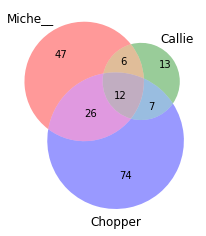

In [136]:
from matplotlib_venn import venn3

# Create sets from genre lists
set1 = genre_sets['Miche__']
set2 = genre_sets['Callie']
set3 = genre_sets['vEonz']
set4 = genre_sets['Chopper']
set5 = genre_sets['Iffat']
# Plot the Venn diagram
venn3([set1, set2, set4], ['Miche__', 'Callie', 'Chopper'], set_colors=('red', 'green', 'blue'))

# Display the plot
plt.show()


#### Commonality between all

In [137]:
# Find the genres that intersect with all three sets
common_genres = set1.intersection(set2, set4)

# Print the common genres
print("Genres that intersect with Callie, Miche, Chopper:")
for genre in common_genres:
    print(genre)

Genres that intersect with Callie, Miche, Chopper:
lo-fi indie
r&b
chill r&b
indie r&b
bedroom pop
underground hip hop
alternative r&b
pop
art pop
indie soul
rap
hip hop


#### Commonality between Callie and Miche_

In [138]:
# Find the genres that intersect with all three sets
common_genres = set1.intersection(set2)

# Print the common genres
print("Genres that intersect with Miche_ and Callie:")
for genre in common_genres:
    print(genre)

Genres that intersect with Miche_ and Callie:
lo-fi indie
canadian hip hop
indie poptimism
electropop
r&b
trap
chill r&b
bedroom pop
underground hip hop
alternative r&b
rap
pop
art pop
indie soul
j-pop
indie r&b
melodic rap
hip hop


#### Commonality between vEonz and Callie

In [139]:
# Find the genres that intersect with all three sets
common_genres = set2.intersection(set3)

# Print the common genres
print("Genres that intersect with vEonz and Callie:")
for genre in common_genres:
    print(genre)

Genres that intersect with vEonz and Callie:
trap
metropopolis
post-teen pop
pop
hip hop
canadian pop
viral rap
art pop
melodic rap
canadian hip hop
underground hip hop
social media pop
rap
pop rap
electropop
dance pop
r&b
uk pop
toronto rap


#### TSNE

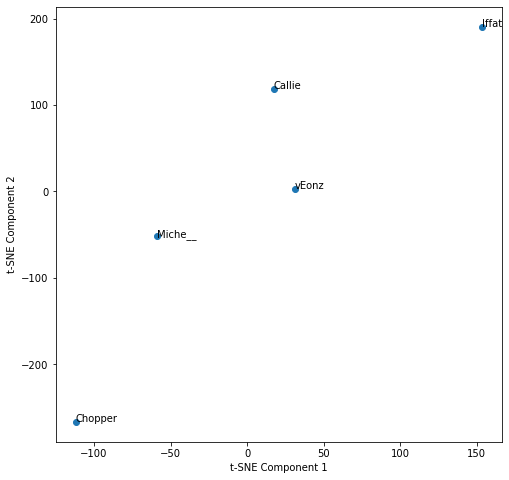

In [140]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Create a list of genres across all persons
all_genres = list(set([genre for person in genre_sets for genre in genre_sets[person]]))

# Create a dictionary to store genre counts for each person
genre_counts = {person: np.zeros(len(all_genres)) for person in genre_sets.keys()}

# Fill in the genre count dictionary
for person in genre_sets.keys():
    genres = genre_sets[person]
    for i, genre in enumerate(all_genres):
        if genre in genres:
            genre_counts[person][i] = 1

# Apply t-SNE
tsne = TSNE(n_components=3, random_state=0, perplexity=1)
embedded = tsne.fit_transform(np.array(list(genre_counts.values())))

# Plot the results
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(embedded[:,0], embedded[:,1])
for i, person in enumerate(genre_counts.keys()):
    ax.annotate(person, (embedded[i,0], embedded[i,1]))
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
plt.show()


#### UpSet Formatting

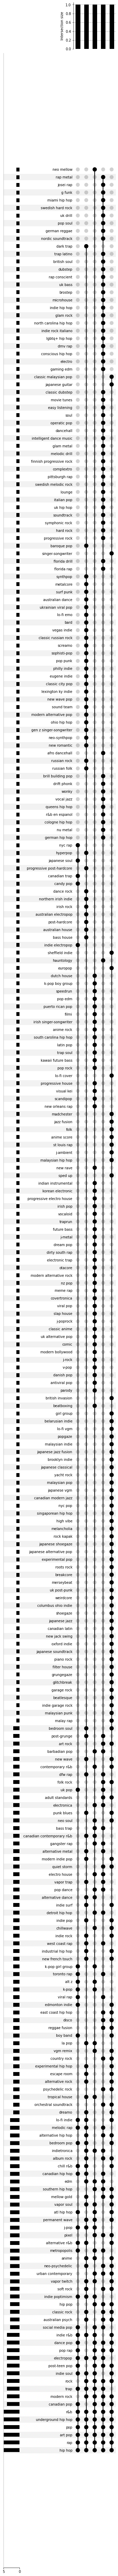

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet
from upsetplot import from_contents

# create a dictionary with genre names as keys and a list of people who like that genre as values
genre_dict = {}
for person, genres in genre_sets.items():
    for genre in genres:
        if genre in genre_dict:
            genre_dict[genre].append(person)
        else:
            genre_dict[genre] = [person]

# create a data frame using from_contents()
genre_df = from_contents(genre_dict)


ax_dict = UpSet(genre_df, subset_size='count', orientation='horizontal').plot()